_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - BONNET Ronan (4IR-A1)
 - CAZENEUVE Anna (4IR-A1)

# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [2]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [3]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [5]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

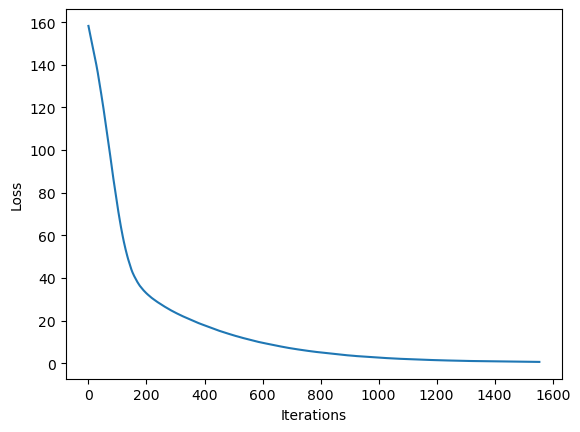

In [6]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

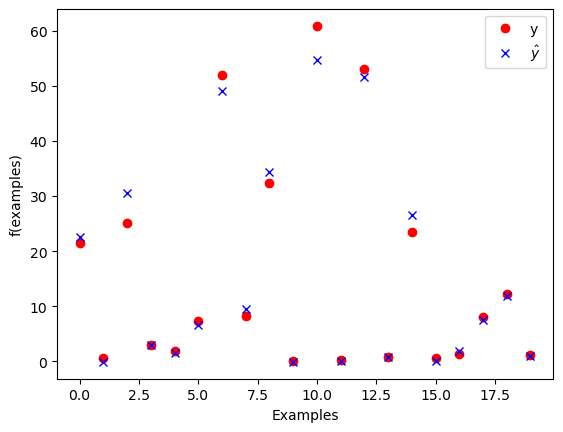

In [7]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?
</div>
<!-- Question End -->

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

- MLP, 100 hiddens layers, with ReLU activation function.
- By default it is 'adam' algorithm. Yes, there's stochastic gradient descent.
- Early start is disabled by default. It stops on max_iter.





</div>
<!-- Answer Section End -->

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [8]:
# clean all previously defined variables for the sailing boats
%reset -f

In [9]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(f"dataset type : {type(cal_housing)}")
print(f"number of data : {len(cal_housing.data)}")
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = pd.DataFrame(cal_housing.target,columns=["target"])

X_all, y_all = shuffle(X_all, y_all, random_state=1)

display(X_all.head(10)) # print the first 10 values
display(y_all.head(10))

dataset type : <class 'sklearn.utils._bunch.Bunch'>
number of data : 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


,target
4712,3.550
2151,0.707
15927,2.294
82,1.125
8161,2.254
6636,2.630
17333,2.268
19081,1.662
13298,1.180
7157,1.563


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Data Preparation

The dataset consists of 20,000 datas. We first extract the last 5,000 for test samples, which we will use later.

For training and validation, we will use a subset consisting of only 2,000 datas to speed up computations.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Split those 2000 remaining dataset between a training set and a validation set (see usage of `train_test_split` function earlier)
- Why did you choose this partition?
- What is the purpose of each subset (train, validation, test) ?

</div>
<!-- Question End -->


Please use the conventional names `X_train`, `X_val`, `y_train` and `y_val`.

In [10]:
# use the last N samples for test (for later use)
num_test_samples = 5000
X_test, y_test = X_all[-num_test_samples:], y_all[-num_test_samples:]

# only use the first N samples to limit training time
num_samples = 2000
X, y = X_all[:num_samples], y_all[:num_samples]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=1, test_size = 0.20)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

- We chose 20%, because empirically it is the best partition.

- Purpose of each subset:
    - Train: Train the model on this data.
    - Validation: While training, we use this set to ensure that the model does not overfit. (biased)
    - Test: After training, it is used to give the accuracy of the model.





</div>
<!-- Answer Section End -->

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Using the `StandardScaler`, first fit this scaler on your training dataset (`X_train`), then use this fitted scaler to transform the training dataset, the validation dataset (`X_val`), and the test dataset (`X_test`).


- Why is it important to fit the scaler only on the training data and not on the entire dataset or separately on each dataset?

</div>
<!-- Question End -->

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

If we fit on data that is different from the training data, then we might not have a good scale on training data.
We do not want to get information from test and validation data sets. 



</div>
<!-- Answer Section End -->

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible. While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Propose a parameterization of the network (number of neurons per layer, number of layers, epochs, learning rates) that will maximize the train score (without considering the test score). Ensure that you disable any form of internal validation checks such as early stopping to promote overfitting.

- Is the **validation** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.
</div>
<!-- Question End -->

In [84]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=800, n_iter_no_change=1000, verbose=True, hidden_layer_sizes=(100,100), activation='relu', learning_rate_init=8e-3, solver='adam')

regr.fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
print("Training Score:", train_score)
val_score = regr.score(X_val,y_val)
print("Validation Score:", val_score)

/home/ronan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.31938729
Iteration 2, loss = 0.38545673
Iteration 3, loss = 0.32432126
Iteration 4, loss = 0.24808604
Iteration 5, loss = 0.22011680
Iteration 6, loss = 0.19952754
Iteration 7, loss = 0.19184359
Iteration 8, loss = 0.18458739
Iteration 9, loss = 0.17684875
Iteration 10, loss = 0.17219054
Iteration 11, loss = 0.16902665
Iteration 12, loss = 0.16566648
Iteration 13, loss = 0.16207517
Iteration 14, loss = 0.16650454
Iteration 15, loss = 0.15450425
Iteration 16, loss = 0.15261713
Iteration 17, loss = 0.15231718
Iteration 18, loss = 0.15018155
Iteration 19, loss = 0.14939672
Iteration 20, loss = 0.14624139
Iteration 21, loss = 0.14035654
Iteration 22, loss = 0.14069284
Iteration 23, loss = 0.14452186
Iteration 24, loss = 0.14395877
Iteration 25, loss = 0.14636230
Iteration 26, loss = 0.14958269
Iteration 27, loss = 0.14921366
Iteration 28, loss = 0.14678654
Iteration 29, loss = 0.14229892
Iteration 30, loss = 0.13771867
Iteration 31, loss = 0.13032280
Iteration 32, los

/home/ronan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

We changed the hidden_layer structure, at least two layers, but not too many because my computer is slow. We also kept ReLU activation function because it is faster to compute. We chose a quite big learning rate, but small enough to not diverge.

Val_score (**0.60**) << Training_score (**0.99**)




</div>
<!-- Answer Section End -->

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **validation** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/val score
- training time

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Present in a table the various parameters tested and the associated results. 
</div>
<!-- Question End -->

You can find a cell in the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [100]:
data = []

In [198]:
params = {'activation': 'relu', 'max_iter': 492, 'hidden_layer_sizes': (100,80), 'learning_rate_init': 0.000311, 'early_stopping': False}

regr_tuna = MLPRegressor(random_state=1,
                         max_iter=params['max_iter'],
                         verbose=False,
                         hidden_layer_sizes=params['hidden_layer_sizes'],
                         early_stopping=params['early_stopping'],
                         activation=params['activation'],
                         learning_rate_init=params['learning_rate_init'],
                         solver='adam')

regr_tuna.fit(X_train, y_train)
train_score = regr_tuna.score(X_train, y_train)
print("Training Score:", train_score)
val_score = regr_tuna.score(X_val,y_val)
print("Validation Score:", val_score)

params['train_score'] = train_score
params['val_score']   = val_score
data.append(params)
# print(data)

/home/ronan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.8720474246820434
Validation Score: 0.7687583080606146


/home/ronan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(


In [199]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
import numpy as np
# data = []
# data.append({'activation': 'relu', 'max_iter': '500', 'test_score': 0.87})
# data.append({'activation': 'tanh', 'max_iter': '200', 'early_stopping': False, 'test_score': 0.91})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='val_score', ascending=False)
table

,activation,max_iter,hidden_layer_sizes,learning_rate_init,train_score,val_score,early_stopping
72,relu,490,"(100, 80)",0.000311,0.871895,0.769290,False
75,relu,495,"(100, 80)",0.000311,0.872379,0.769193,False
44,relu,400,"(110, 80, 50, 30, 10)",0.000080,0.870992,0.768882,False
76,relu,492,"(100, 80)",0.000311,0.872047,0.768758,False
59,relu,500,"(100, 80)",0.000311,0.873699,0.768713,False
...,...,...,...,...,...,...,...
2,tanh,200,"(100, 100)",0.000100,0.666828,0.669213,-
6,logistic,500,"(100, 50)",0.000100,0.639669,0.641781,-
37,relu,400,"(110, 80, 50, 30, 10)",0.000010,0.646184,0.638862,False
4,tanh,500,"(100, 20)",0.000010,0.569222,0.550409,-


## Evaluation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
- Evaluate the score of your model on the test set that was not used for training nor for model selection.
- Train a model using your optimal parameters on the initial 15,000 data points. Evaluate the performance using the test set. What are your thoughts on the amount of data used? Do you believe the time spent is worthwhile in terms of the improvement in performance?
</div>
<!-- Question End -->

In [211]:
test_score = regr_tuna.score(X_test,y_test)
print("Test Score:", test_score)

num_samples2 = 15000
X_i, y_i = X_all[:num_samples2], y_all[:num_samples2]

X_i_train, X_i_val, y_i_train, y_i_val = train_test_split(X_i, y_i,random_state=1, test_size = 0.20)
scaler = StandardScaler()
scaler.fit(X_i_train)
X_i_train = scaler.transform(X_i_train)
X_i_test = scaler.transform(X_test)
X_i_val = scaler.transform(X_i_val)

params_final = {'activation': 'relu', 'max_iter': 490, 'hidden_layer_sizes': (100,80), 'learning_rate_init': 0.000311, 'early_stopping': False}

regr_final = MLPRegressor(random_state=1,
                         max_iter=params_final['max_iter'],
                         verbose=False,
                         hidden_layer_sizes=params_final['hidden_layer_sizes'],
                         early_stopping=params_final['early_stopping'],
                         activation=params_final['activation'],
                         learning_rate_init=params_final['learning_rate_init'],
                         solver='adam')

regr_final.fit(X_i_train, y_i_train)
train_score_final = regr_final.score(X_i_train, y_i_train)
print("Training Score:", train_score_final)
val_score_final = regr_final.score(X_i_val, y_i_val)
print("Validation Score:", val_score_final)
test_score_final = regr_final.score(X_i_test,y_test)
print("Test Score:", test_score_final)


Test Score: 0.7400629486481924


/home/ronan/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/ronan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.8133368473818453
Validation Score: 0.7938748040007997
Test Score: -484.5492438662007


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**


The best model seems to be {'activation': 'relu', 'max_iter': 490, 'hidden_layer_sizes': (100,80), 'learning_rate_init': 0.000311, 'early_stopping': False}





</div>
<!-- Answer Section End -->